## Project Outline

1. We're going to scrape https://github.com/topics
2. We'll get a list of topics. For each topic, we'll get topic title, topic page URL and topic description
3. For each topic, we'll get the top repositories in the topic from the topic page
4. For each repository, we'll grab the repo name, username, stars and repo URL and  create a  pandas dataframe


###  Step 1 :: Use requests library to download webpages

In [1]:
import requests

In [2]:
url='https://github.com/topics'

In [3]:
response=requests.get('https://github.com/topics')

In [4]:
page_contents = response.text

In [5]:
with open('webpage.html', 'w',encoding='utf-8') as f:
    f.write(page_contents)

### Step 2 :: Use BeautifulSoup to Parse and Extract information 

In [6]:
from bs4 import BeautifulSoup

In [7]:
parsed_doc=BeautifulSoup(page_contents,'lxml')   # parsing the html file

In [8]:
# collecting the topics info from the webpage by inspecting it.

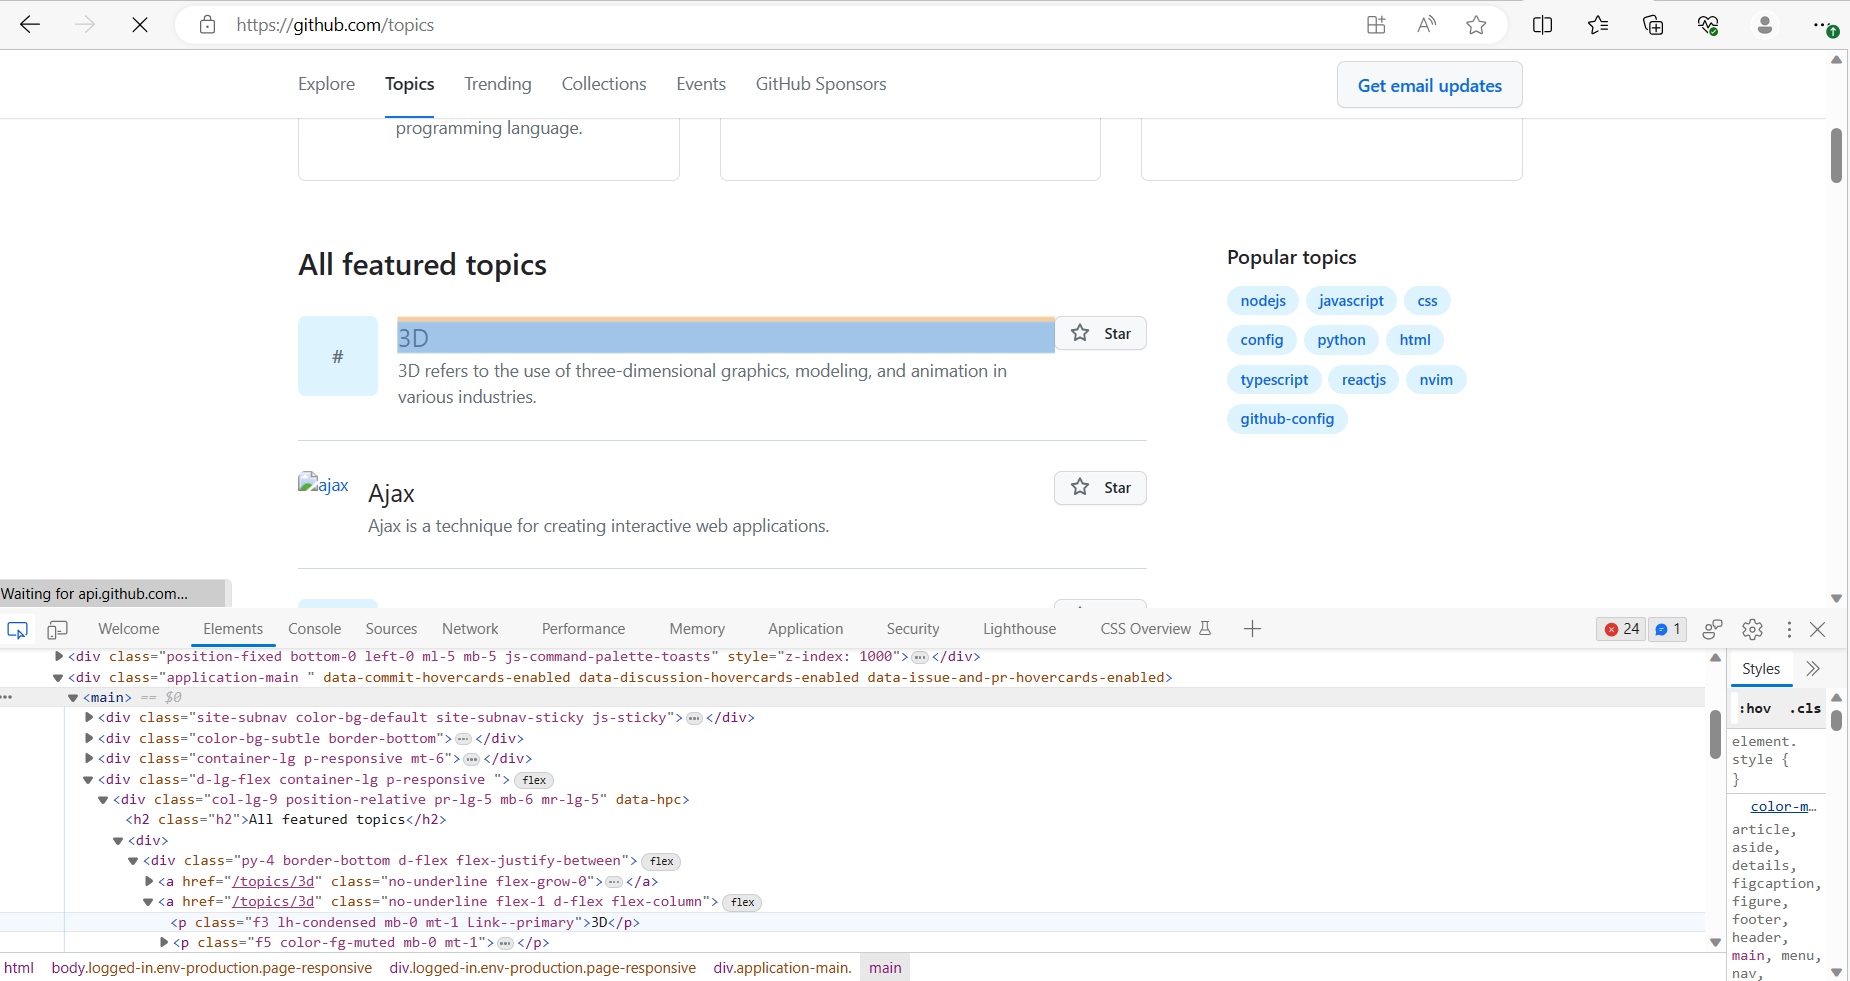

In [9]:
parsed_doc.find_all('p')

[<p>We read every piece of feedback, and take your input very seriously.</p>,
 <p class="text-small color-fg-muted">
             To see all available qualifiers, see our <a class="Link--inTextBlock" href="https://docs.github.com/en/search-github/github-code-search/understanding-github-code-search-syntax">documentation</a>.
           </p>,
 <p class="f4 color-fg-muted col-md-6 mx-auto">Browse popular topics on GitHub.</p>,
 <p class="f3 lh-condensed text-center Link--primary mb-0 mt-1">
         Pixel Art
       </p>,
 <p class="f5 color-fg-muted text-center mb-0 mt-1">Pixel art is a form of digital art where images are created and edited at the pixel level.</p>,
 <p class="f3 lh-condensed text-center Link--primary mb-0 mt-1">
         npm
       </p>,
 <p class="f5 color-fg-muted text-center mb-0 mt-1">npm is a package manager for JavaScript included with Node.js.</p>,
 <p class="f3 lh-condensed text-center Link--primary mb-0 mt-1">
         Raspberry Pi
       </p>,
 <p class="f5 co

In [10]:
len(parsed_doc.find_all('p'))  # we see there are 69 elements with 'p'tag

69

In [11]:
# we need to specify the class to get to the topics, from all the paragraph tags
topics=parsed_doc.find_all('p', class_="f3 lh-condensed mb-0 mt-1 Link--primary")   # we now got all the topics

In [12]:

len(parsed_doc.find_all('p', class_="f3 lh-condensed mb-0 mt-1 Link--primary"))

30

In [13]:
# we now want to extract the description
topidescribe=parsed_doc.find_all('p',class_="f5 color-fg-muted mb-0 mt-1")
# Now we got the desciption of each topic

In [14]:
# we now need the topic url, where we can download more things

In [15]:
links=parsed_doc.find_all('a',class_="no-underline flex-1 d-flex flex-column")

In [16]:
parsed_doc.find_all('a',class_="no-underline flex-1 d-flex flex-column")[0]['href']

'/topics/3d'

In [17]:
print("https://github.com" + parsed_doc.find_all('a',class_="no-underline flex-1 d-flex flex-column")[0]['href'])

https://github.com/topics/3d


In [18]:
# we now want to create a list of topic titles
topic_title=[]
for i in topics:
    topic_title.append(i.text)

In [19]:
topic_title

['3D',
 'Ajax',
 'Algorithm',
 'Amp',
 'Android',
 'Angular',
 'Ansible',
 'API',
 'Arduino',
 'ASP.NET',
 'Atom',
 'Awesome Lists',
 'Amazon Web Services',
 'Azure',
 'Babel',
 'Bash',
 'Bitcoin',
 'Bootstrap',
 'Bot',
 'C',
 'Chrome',
 'Chrome extension',
 'Command line interface',
 'Clojure',
 'Code quality',
 'Code review',
 'Compiler',
 'Continuous integration',
 'COVID-19',
 'C++']

In [20]:
# list of topic description
topic_descb=[]
for i in topidescribe:
    topic_descb.append(i.text.strip())

In [21]:
topic_descb

['3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.',
 'Ajax is a technique for creating interactive web applications.',
 'Algorithms are self-contained sequences that carry out a variety of tasks.',
 'Amp is a non-blocking concurrency library for PHP.',
 'Android is an operating system built by Google designed for mobile devices.',
 'Angular is an open source web application platform.',
 'Ansible is a simple and powerful automation engine.',
 'An API (Application Programming Interface) is a collection of protocols and subroutines for building software.',
 'Arduino is an open source platform for building electronic devices.',
 'ASP.NET is a web framework for building modern web apps and services.',
 'Atom is a open source text editor built with web technologies.',
 'An awesome list is a list of awesome things curated by the community.',
 'Amazon Web Services provides on-demand cloud computing platforms on a subscription basis.',
 'Azure 

In [22]:
#list of topic links
topic_links=[]
for i in links:
    topic_links.append("https://github.com"+i['href'])

In [23]:
topic_links

['https://github.com/topics/3d',
 'https://github.com/topics/ajax',
 'https://github.com/topics/algorithm',
 'https://github.com/topics/amphp',
 'https://github.com/topics/android',
 'https://github.com/topics/angular',
 'https://github.com/topics/ansible',
 'https://github.com/topics/api',
 'https://github.com/topics/arduino',
 'https://github.com/topics/aspnet',
 'https://github.com/topics/atom',
 'https://github.com/topics/awesome',
 'https://github.com/topics/aws',
 'https://github.com/topics/azure',
 'https://github.com/topics/babel',
 'https://github.com/topics/bash',
 'https://github.com/topics/bitcoin',
 'https://github.com/topics/bootstrap',
 'https://github.com/topics/bot',
 'https://github.com/topics/c',
 'https://github.com/topics/chrome',
 'https://github.com/topics/chrome-extension',
 'https://github.com/topics/cli',
 'https://github.com/topics/clojure',
 'https://github.com/topics/code-quality',
 'https://github.com/topics/code-review',
 'https://github.com/topics/compil

### Step 3:: Creating a csv file of the information we have recieved.

In [24]:
import pandas as pd

In [25]:
df=pd.DataFrame()

In [26]:
df['topic_name']= topic_title

In [27]:
df['topic_url']= topic_links

In [28]:
df['description']=topic_descb

In [29]:
df

,topic_name,topic_url,description
0,3D,https://github.com/topics/3d,3D refers to the use of three-dimensional grap...
1,Ajax,https://github.com/topics/ajax,Ajax is a technique for creating interactive w...
2,Algorithm,https://github.com/topics/algorithm,Algorithms are self-contained sequences that c...
3,Amp,https://github.com/topics/amphp,Amp is a non-blocking concurrency library for ...
4,Android,https://github.com/topics/android,Android is an operating system built by Google...
5,Angular,https://github.com/topics/angular,Angular is an open source web application plat...
6,Ansible,https://github.com/topics/ansible,Ansible is a simple and powerful automation en...
7,API,https://github.com/topics/api,An API (Application Programming Interface) is ...
8,Arduino,https://github.com/topics/arduino,Arduino is an open source platform for buildin...
9,ASP.NET,https://github.com/topics/aspnet,ASP.NET is a web framework for building modern...


In [30]:
df.to_csv('topics.csv')

## Getting information out of a topic page 

In [31]:
topic_links[0]   # this gives link to our first topic

'https://github.com/topics/3d'

In [32]:
requests.get(topic_links[0])     # sending request to download topic page

<Response [200]>

In [33]:
#Repeating the same steps for getting information about each topic
topic1=BeautifulSoup(requests.get(topic_links[0]).text, 'lxml')

In [34]:
topic1.prettify

<bound method Tag.prettify of <!DOCTYPE html>
<html data-a11y-animated-images="system" data-a11y-link-underlines="false" data-color-mode="auto" data-dark-theme="dark" data-light-theme="light" lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="" href="https://github.githubassets.com" rel="preconnect"/>
<link href="https://avatars.githubusercontent.com" rel="preconnect"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/light-8cafbcbd78f4.css" media="all" rel="stylesheet"/><link crossorigin="anonymous" href="https://github.githubassets.com/assets/dark-31dc14e38457.css" media="all" rel="stylesheet"/><link crossorigin="anonymous" data-color-theme="dark_dimmed" data-href="h

In [35]:
# fetching repository name and username 
class1="f3 color-fg-muted text-normal lh-condensed"
topic_repo=topic1.find_all('h3',class_="f3 color-fg-muted text-normal lh-condensed")

In [36]:
# fetching ratings
starr='Counter js-social-count'
topic_ratings=topic1.find_all('span',class_='Counter js-social-count')

In [37]:
user_name=[]
for i in topic_repo:
    user_name.append(i.find_all('a')[0].text.strip())

In [38]:
namee=[]
for i in topic_repo:
    namee.append(i.find_all('a')[1].text.strip())

In [39]:
ratings=[]
for i in topic_ratings:
    ratings.append(i.text)

In [40]:
urls=[]
for i in topic_repo:
    urls.append('https://github.com'+i.find_all('a')[1]['href'])

In [41]:
namee

['three.js',
 'react-three-fiber',
 'libgdx',
 'Babylon.js',
 'tinyrenderer',
 '3d-game-shaders-for-beginners',
 'aframe',
 'FreeCAD',
 'cesium',
 'zdog',
 'Open3D',
 'blender',
 '3D-Machine-Learning',
 'SpaceshipGenerator',
 'BlenderGIS',
 'Fyrox',
 'nerfstudio',
 'model-viewer',
 'openscad',
 'spritejs']

In [42]:
user_name

['mrdoob',
 'pmndrs',
 'libgdx',
 'BabylonJS',
 'ssloy',
 'lettier',
 'aframevr',
 'FreeCAD',
 'CesiumGS',
 'metafizzy',
 'isl-org',
 'blender',
 'timzhang642',
 'a1studmuffin',
 'domlysz',
 'FyroxEngine',
 'nerfstudio-project',
 'google',
 'openscad',
 'spritejs']

In [43]:
ratings

['93.8k',
 '23.5k',
 '21.8k',
 '21.2k',
 '17.6k',
 '15.9k',
 '15.6k',
 '14.8k',
 '10.8k',
 '10k',
 '9.3k',
 '9.2k',
 '9k',
 '7.4k',
 '6.6k',
 '6.4k',
 '6.2k',
 '5.9k',
 '5.8k',
 '5.2k']

In [44]:
urls

['https://github.com/mrdoob/three.js',
 'https://github.com/pmndrs/react-three-fiber',
 'https://github.com/libgdx/libgdx',
 'https://github.com/BabylonJS/Babylon.js',
 'https://github.com/ssloy/tinyrenderer',
 'https://github.com/lettier/3d-game-shaders-for-beginners',
 'https://github.com/aframevr/aframe',
 'https://github.com/FreeCAD/FreeCAD',
 'https://github.com/CesiumGS/cesium',
 'https://github.com/metafizzy/zdog',
 'https://github.com/isl-org/Open3D',
 'https://github.com/blender/blender',
 'https://github.com/timzhang642/3D-Machine-Learning',
 'https://github.com/a1studmuffin/SpaceshipGenerator',
 'https://github.com/domlysz/BlenderGIS',
 'https://github.com/FyroxEngine/Fyrox',
 'https://github.com/nerfstudio-project/nerfstudio',
 'https://github.com/google/model-viewer',
 'https://github.com/openscad/openscad',
 'https://github.com/spritejs/spritejs']

In [45]:
# Creating a data frame containg information about the repositories under each topic

In [46]:
topic_df=pd.DataFrame()

In [47]:
topic_df['username']=user_name

In [48]:
topic_df['repo_name']=namee

In [49]:
topic_df['rating']=ratings

In [50]:
topic_df['url']=urls

In [51]:
topic_df

,username,repo_name,rating,url
0,mrdoob,three.js,93.8k,https://github.com/mrdoob/three.js
1,pmndrs,react-three-fiber,23.5k,https://github.com/pmndrs/react-three-fiber
2,libgdx,libgdx,21.8k,https://github.com/libgdx/libgdx
3,BabylonJS,Babylon.js,21.2k,https://github.com/BabylonJS/Babylon.js
4,ssloy,tinyrenderer,17.6k,https://github.com/ssloy/tinyrenderer
5,lettier,3d-game-shaders-for-beginners,15.9k,https://github.com/lettier/3d-game-shaders-for...
6,aframevr,aframe,15.6k,https://github.com/aframevr/aframe
7,FreeCAD,FreeCAD,14.8k,https://github.com/FreeCAD/FreeCAD
8,CesiumGS,cesium,10.8k,https://github.com/CesiumGS/cesium
9,metafizzy,zdog,10k,https://github.com/metafizzy/zdog


In [52]:
# formating the rating columns and changing the type to int
topic_df['rating']=topic_df['rating'].apply(lambda x:x[:-1],)

In [53]:
topic_df['rating']=topic_df['rating'].astype('float')

In [54]:
topic_df['rating']=topic_df['rating']*1000

In [55]:
topic_df['rating']=topic_df['rating'].astype('int')

In [56]:
topic_df['rating']

0     93800
1     23500
2     21800
3     21200
4     17600
5     15900
6     15600
7     14800
8     10800
9     10000
10     9300
11     9200
12     9000
13     7400
14     6600
15     6400
16     6200
17     5900
18     5800
19     5200
Name: rating, dtype: int32

## Lets automate this process:


Creating a function, which would take the topic link as an argument and give information about all the repositories under that topic

In [57]:
#we need all the urls from where we can get information:
def get_parsed_doc(url_link):
    
    response=requests.get(url_link).text
    parsed_doc=BeautifulSoup(response,'lxml')    #paring the html repository page
    
    
    class1="f3 color-fg-muted text-normal lh-condensed"
    starr='Counter js-social-count'
    a_tag=parsed_doc.find_all('h3',class_=class1)
    star_tag=parsed_doc.find_all('span',class_=starr)
    
    dict1={'username':[],'repo_name':[],'repo_url':[],'repo_ratings':[]}
    
    for i in range(len(a_tag)):
        dict1['username'].append(a_tag[i].find_all('a')[0].text.strip())
        dict1['repo_name'].append(a_tag[i].find_all('a')[1].text.strip())
        dict1['repo_url'].append('https://github.com'+a_tag[i].find_all('a')[1]['href'])
        dict1['repo_ratings'].append(star_tag[i].text)
    return pd.DataFrame(dict1)    
    